In [1]:
import splitfolders

import numpy as np
import matplotlib.pyplot as plt

from keras.layers import MaxPooling2D, Conv2D, Flatten, Dense
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Splits data into 75% Train, 15% Validation, and 10% Test
splitfolders.ratio('../data/asl_alphabet_train/',output='../data/split/original/', seed=42, ratio=(0.75, 0.15, 0.1))

In [3]:
datagen = ImageDataGenerator(rescale= 1.0 / 255)

train = datagen.flow_from_directory(directory= '../data/split/train/', 
                                         target_size=(256, 256), 
                                         batch_size = 32, 
                                         class_mode='categorical')

val = datagen.flow_from_directory(directory= '../data/split/val/', 
                                       target_size=(256, 256), 
                                       batch_size = 32, 
                                       class_mode='categorical',
                                       )

test = datagen.flow_from_directory(directory= '../data/split/test/', 
                                         target_size=(256, 256), 
                                         batch_size = 32, 
                                         class_mode='categorical')


Found 143937 images belonging to 24 classes.
Found 29018 images belonging to 24 classes.
Found 19461 images belonging to 24 classes.


In [4]:
model = Sequential()

model.add(Conv2D(32, 3, activation="relu", input_shape=(256, 256, 3)))
model.add(MaxPooling2D(2))


model.add(Conv2D(64, 3, activation="relu"))
model.add(MaxPooling2D(2))


model.add(Conv2D(128, 3, activation="relu"))
model.add(MaxPooling2D(2))


model.add(Conv2D(256, 3, activation="relu"))
model.add(MaxPooling2D(2))


model.add(Flatten())
model.add(Dense(512, activation="relu"))


model.add(Dense(24, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])

early_stopping = EarlyStopping(
    patience=5, monitor="val_loss", restore_best_weights=True
)

history = model.fit(
    train,
    validation_data=val,
    epochs=30,
    callbacks=[early_stopping],
)

2024-02-11 13:35:39.131681: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-11 13:35:39.266729: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-11 13:35:39.266801: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-11 13:35:39.268938: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-11 13:35:39.269043: I external/local_xla/xla/stream_executor

Epoch 1/30


2024-02-11 13:35:42.469675: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-02-11 13:35:42.683065: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-11 13:35:43.261144: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-11 13:35:43.358661: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fbf10d596c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-11 13:35:43.358702: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Ti SUPER, Compute Capability 8.9
2024-02-11 13:35:43.372499: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1707687343.514633    1925 device_

4499/4499 [==============================] - 1440s 319ms/step - loss: 0.4677 - acc: 0.8595 - val_loss: 0.1239 - val_acc: 0.9653
Epoch 2/30
4499/4499 [==============================] - 923s 205ms/step - loss: 0.0725 - acc: 0.9794 - val_loss: 0.1058 - val_acc: 0.9739
Epoch 3/30
4499/4499 [==============================] - 1267s 282ms/step - loss: 0.0427 - acc: 0.9880 - val_loss: 0.0555 - val_acc: 0.9872
Epoch 4/30
4499/4499 [==============================] - 742s 165ms/step - loss: 0.0316 - acc: 0.9913 - val_loss: 0.0741 - val_acc: 0.9847
Epoch 5/30
4499/4499 [==============================] - 759s 169ms/step - loss: 0.0240 - acc: 0.9939 - val_loss: 0.0594 - val_acc: 0.9886
Epoch 6/30
4499/4499 [==============================] - 775s 172ms/step - loss: 0.0205 - acc: 0.9949 - val_loss: 0.0584 - val_acc: 0.9896
Epoch 7/30
4499/4499 [==============================] - 850s 189ms/step - loss: 0.0168 - acc: 0.9960 - val_loss: 0.0586 - val_acc: 0.9901
Epoch 8/30
4499/4499 [=====================

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.save("../data/model.keras")

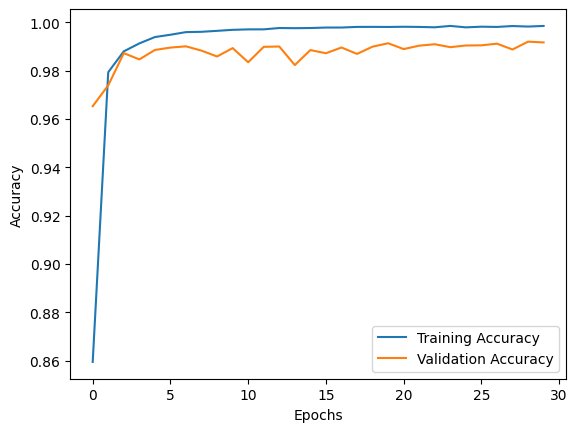

In [11]:
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.savefig('../images/accuracy.png', bbox_inches='tight')

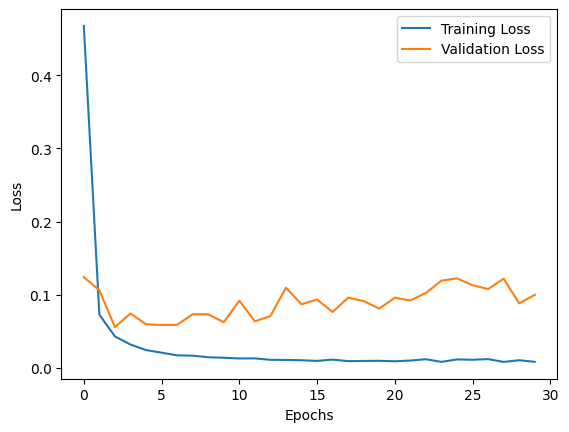

In [12]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('../images/loss.png', bbox_inches='tight')

In [10]:
print(f"Test Accuracy: {model.evaluate(test)[1]:.4f}")
print(f"Train Accuracy: {model.evaluate(train)[1]:.4f}")

609/609 [==============================] - 84s 138ms/step - loss: 0.0899 - acc: 0.9919
Test Accuracy: 0.9919
4499/4499 [==============================] - 734s 163ms/step - loss: 0.0015 - acc: 0.9996
Train Accuracy: 0.9996


In [4]:
model = load_model('../data/model.keras')

In [24]:
img_path = "../data/asl_alphabet_test/X_test.jpg"

img = image.load_img(img_path, target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)

class_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
predicted_class = class_labels[np.argmax(predictions)]
print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 21ms/step
Predicted class: X
